In [1]:
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.library.parameters import SeasonAll
import pandas as pd 
import numpy as np
from scipy.interpolate import make_interp_spline

import seaborn as sns
import matplotlib.pyplot as plt

#---------- Define Vars for Plotting -----------------#
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)


In [2]:
#-- Define player IDs

player_names = ['Lebron James', 'Kareem Adbul-Jabbar', 'Karl Malone', 'Kobe Bryant', 'Michael Jordan', 'Dirk Nowitzki']

player_ids = [2544, 76003, 252, 977, 893, 1717]

#-- Retrive data from API 
game_logs =[]
for i in player_ids:
    game_logs.append(playergamelog.PlayerGameLog(player_id=i, season = SeasonAll.all).get_data_frames()[0].sort_index(ascending = False).reset_index(drop = True))

player_data = dict(zip(player_names, game_logs))

#-- Enter any player from superstar list to access their game log
player_data["Lebron James"].GAME_DATE

0       OCT 29, 2003
1       OCT 30, 2003
2       NOV 01, 2003
3       NOV 05, 2003
4       NOV 07, 2003
            ...     
1408    FEB 04, 2023
1409    FEB 07, 2023
1410    FEB 15, 2023
1411    FEB 23, 2023
1412    FEB 26, 2023
Name: GAME_DATE, Length: 1413, dtype: object

In [3]:
for i in player_names:
    player_data[i]['GAME_DATE'] = pd.to_datetime(player_data[i]['GAME_DATE'])

In [106]:
for i in player_names:
    player_data[i]['SEASON_YEAR'] = None
    for x in range(len(player_data[i]['SEASON_ID'])):
        player_data[i]['SEASON_YEAR'][x] = pd.to_numeric(player_data[i]['SEASON_ID'][x][1:])

/var/folders/bh/f_n1lys118dd__48sbs22ffm0000gn/T/ipykernel_83549/3802148778.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data[i]['SEASON_YEAR'][x] = pd.to_numeric(player_data[i]['SEASON_ID'][x][1:])


In [13]:
LBJ = player_data['Lebron James']
KAJ = player_data['Kareem Adbul-Jabbar']
KM = player_data['Karl Malone']
KB = player_data['Kobe Bryant']
MJ = player_data['Michael Jordan']
DN = player_data['Dirk Nowitzki']

In [24]:
KAJ.sort_index(ascending=False).MIN.cumsum().reset_index()['MIN']

0          48
1          77
2         119
3         167
4         209
        ...  
1555    55958
1556    55977
1557    55999
1558    56015
1559    56041
Name: MIN, Length: 1560, dtype: int64

In [ ]:
LBJ.sort_index(ascending=False).PTS.cumsum().reset_index()['PTS']
KAJ.sort_index(ascending=False).PTS.cumsum().reset_index()['PTS'].plot()
KM.sort_index(ascending=False).PTS.cumsum().reset_index()['PTS'].plot()
KB.sort_index(ascending=False).PTS.cumsum().reset_index()['PTS'].plot()
MJ.sort_index(ascending=False).PTS.cumsum().reset_index()['PTS'].plot()
DN.sort_index(ascending=False).PTS.cumsum().reset_index()['PTS'].plot()

In [51]:
LBJ['TOTAL_MIN'] = LBJ.sort_index(ascending = False).reset_index(drop = True).MIN.cumsum()


0          42
1          83
2         122
3         163
4         207
        ...  
1408    53717
1409    53751
1410    53780
1411    53806
1412    53843
Name: MIN, Length: 1413, dtype: int64

In [9]:
player_data['Lebron James'].PTS.cumsum()

0          25
1          46
2          54
3          61
4          84
        ...  
1408    38352
1409    38390
1410    38411
1411    38424
1412    38450
Name: PTS, Length: 1413, dtype: int64

/var/folders/bh/f_n1lys118dd__48sbs22ffm0000gn/T/ipykernel_83549/3137296296.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


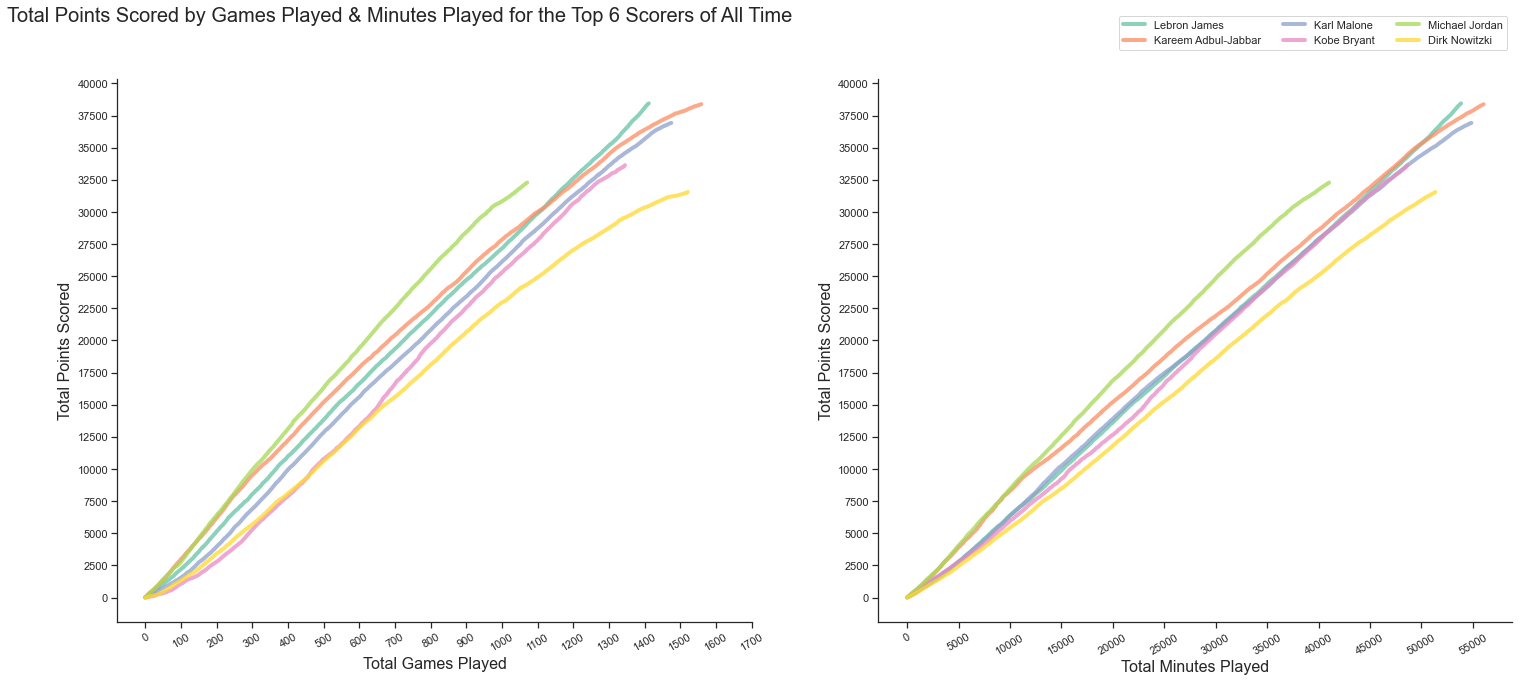

In [18]:
fig, ax = plt.subplots(1, 2, sharey = False, figsize = (25, 10))
sns.set_palette("Set2")
fontparams = {'font' : 'Arial', 'fontsize' : 16}

#-- Player career total points based on games played 
for i in player_names:
    ax[0].plot(player_data[i].PTS.cumsum()
               , linewidth = 4
               , alpha = .75)

ax[0].set_xticks(range(0, 1800, 100))
ax[0].set_xticklabels(labels = range(0,1800,100), rotation = 30)
ax[0].set_xlabel('Total Games Played', fontdict = fontparams)

ax[0].set_yticks(range(0, 42500, 2500))
ax[0].set_yticklabels(labels = range(0, 42500, 2500))
ax[0].set_ylabel('Total Points Scored', fontdict = fontparams)

#ax[0].set_title('Total Points Scored by Games Played & Minutes Played for the Top 6 Scorers of All Time'
#                , loc = 'left'
#                , fontdict = {'font' : 'Arial', 'fontsize' : 20})

# ax[0].legend(player_names)

#-- Player career total points based on minutes played
for i in player_names:
    ax[1].plot(player_data[i].MIN.cumsum()
                , player_data[i].PTS.cumsum()
                , linewidth = 4
                , alpha = .75)

ax[1].set_xticks(range(0, 60000, 5000))
ax[1].set_xticklabels(range(0, 60000, 5000), rotation = 30)                
ax[1].set_xlabel('Total Minutes Played', fontdict = fontparams)

ax[1].set_yticks(range(0, 42500, 2500))
ax[1].set_yticklabels(labels = range(0, 42500, 2500))
ax[1].set_ylabel('Total Points Scored', fontdict = fontparams)

fig.suptitle('Total Points Scored by Games Played & Minutes Played for the Top 6 Scorers of All Time', ha = 'right', fontsize = 20)
fig.legend(player_names, bbox_to_anchor=(.90, .975), ncol = 3)
fig.show()


### Inflation $\pi$

Here we look at the movement of the average total points scored in a game by a team across the history of the NBA. The data is provided by Basketball Reference and goes back to the 1946 NBA season. 

In [80]:
#---------- Load in Inflation Data -------------#
ldata = pd.read_csv('nba_league_per_game_averages.csv')
ldata.head()

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,1,2022-23,NBA,26.1,6-6,216.0,931,241.9,41.8,88.2,...,114.3,0.474,0.359,0.781,99.2,0.543,12.7,24.1,0.210,114.3
1,2,2021-22,NBA,26.1,6-6,215.0,1230,241.4,40.6,88.1,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,3,2020-21,NBA,26.1,6-6,217.0,1080,241.4,41.2,88.4,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,4,2019-20,NBA,26.1,6-6,218.0,1059,241.8,40.9,88.8,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,5,2018-19,NBA,26.3,6-6,219.0,1230,241.6,41.1,89.2,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4


In [81]:
#--------------- Data cleanup -------------#

#-- Get the year from the season column for joining and plotting uses
ldata['YEAR'] = pd.to_numeric(ldata['Season'].apply(lambda x: x[:4]))

#-- Sort data so 1946 is at the top and 2022 at the bottom 
ldata = ldata.sort_values(by = 'Rk', ascending = False).reset_index(drop = True)

#-- Calculate scoring inflation YoY
ldata['INFLATION'] = ldata.PTS / ldata.PTS.shift(periods = 1) - 1
ldata['CPI_100'] = ldata.PTS / 100 - 1

#-- Set the index to the YEAR column
ldata.set_index('YEAR', inplace = True)

In [82]:
ldata.head()

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg,INFLATION,CPI_100
YEAR,,,,,,,,,,,,,,,,,,,,,
1946,77,1946-47,BAA,NaN,NaN,NaN,331,NaN,25.9,92.9,...,NaN,0.641,NaN,0.279,NaN,NaN,0.171,NaN,NaN,-0.322
1947,76,1947-48,BAA,NaN,NaN,NaN,192,NaN,27.2,96.0,...,NaN,0.675,NaN,0.284,NaN,NaN,0.190,NaN,0.072271,-0.273
1948,75,1948-49,BAA,NaN,NaN,NaN,360,NaN,29.0,88.7,...,NaN,0.703,NaN,0.327,NaN,NaN,0.248,NaN,0.100413,-0.200
1949,74,1949-50,NBA,NaN,NaN,NaN,561,NaN,28.2,83.1,...,NaN,0.714,NaN,0.340,NaN,NaN,0.284,NaN,0.000000,-0.200
1950,73,1950-51,NBA,NaN,NaN,NaN,354,NaN,29.8,83.6,...,NaN,0.733,NaN,0.357,NaN,NaN,0.293,NaN,0.051250,-0.159


/var/folders/bh/f_n1lys118dd__48sbs22ffm0000gn/T/ipykernel_83549/590095561.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


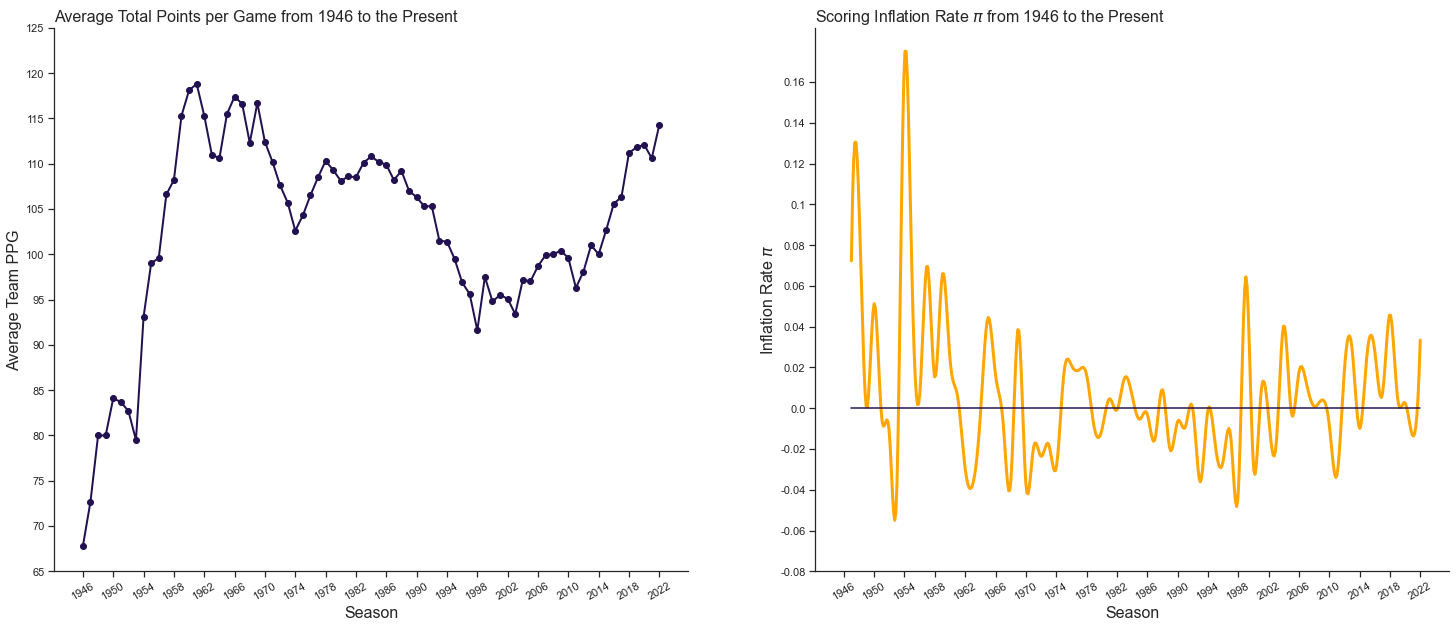

In [101]:
#------------- Inflation Plot ------------------#
fig, ax = plt.subplots(1, 2, sharex=True, figsize = (25, 10))
sns.set_palette('magma')
fontparams = {'font' : 'Arial', 'fontsize' : 16}

#-- Team Average PPG --#
ax[0].plot(ldata.PTS
            , linewidth = 2
            , marker = 'o')

x_0_ticks = range(1946, 2026, 4)
ax[0].set_xticks(x_0_ticks)
ax[0].set_xticklabels(x_0_ticks, rotation = 30)
ax[0].set_xlabel('Season', fontdict = fontparams)

y_0_ticks = range(65, 130, 5)
ax[0].set_yticks(y_0_ticks)
ax[0].set_yticklabels(y_0_ticks)
ax[0].set_ylabel('Average Team PPG', fontdict = fontparams)

ax[0].set_title('Average Total Points per Game from 1946 to the Present'
                , loc = 'left'
                , fontdict = fontparams)

#-- Inflation --#
x_vec_1 = pd.to_numeric(ldata.reset_index().YEAR)[1:]
y_vec_1 = ldata.INFLATION.dropna()

X_Y_Spline_1 = make_interp_spline(x_vec_1, y_vec_1)
 
# Returns evenly spaced numbers
# over a specified interval.
X_1 = np.linspace(x_vec_1.min(), x_vec_1.max(), 500)
Y_1 = X_Y_Spline(X_1)

# Plotting the Graph
ax[1].plot(X_1, Y_1
            , linewidth = 3
            , color = '#ffa600')

ax[1].plot(X_1, np.linspace(0,0,500))

ax[1].set_xticklabels(x_0_ticks, rotation = 30)
ax[1].set_xlabel('Season', fontdict = fontparams)

ax[1].set_yticks(np.round( np.arange(-.08, .18, step = .02), 2))
ax[1].set_yticklabels(np.round( np.arange(-.08, .18, step = .02), 2))
ax[1].set_ylabel('Inflation Rate $\pi$', fontdict = fontparams)
ax[1].set_title('Scoring Inflation Rate $\pi$ from 1946 to the Present'
                , loc = 'left'
                , fontdict = fontparams)

#-- Final output display
fig.savefig('scoring_inflation_and_points_plot.png', dpi = 300)
fig.show()


Rule changes and officiating have moved the total points scored from year to year but in the 25 seasons that number has climbed from roughly 92 to 114, a 22 point increase in the average amount of points a team is scoring on a nightly basis. 

### Velocity of Total Points $\partial P$

/var/folders/bh/f_n1lys118dd__48sbs22ffm0000gn/T/ipykernel_83549/1540460307.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


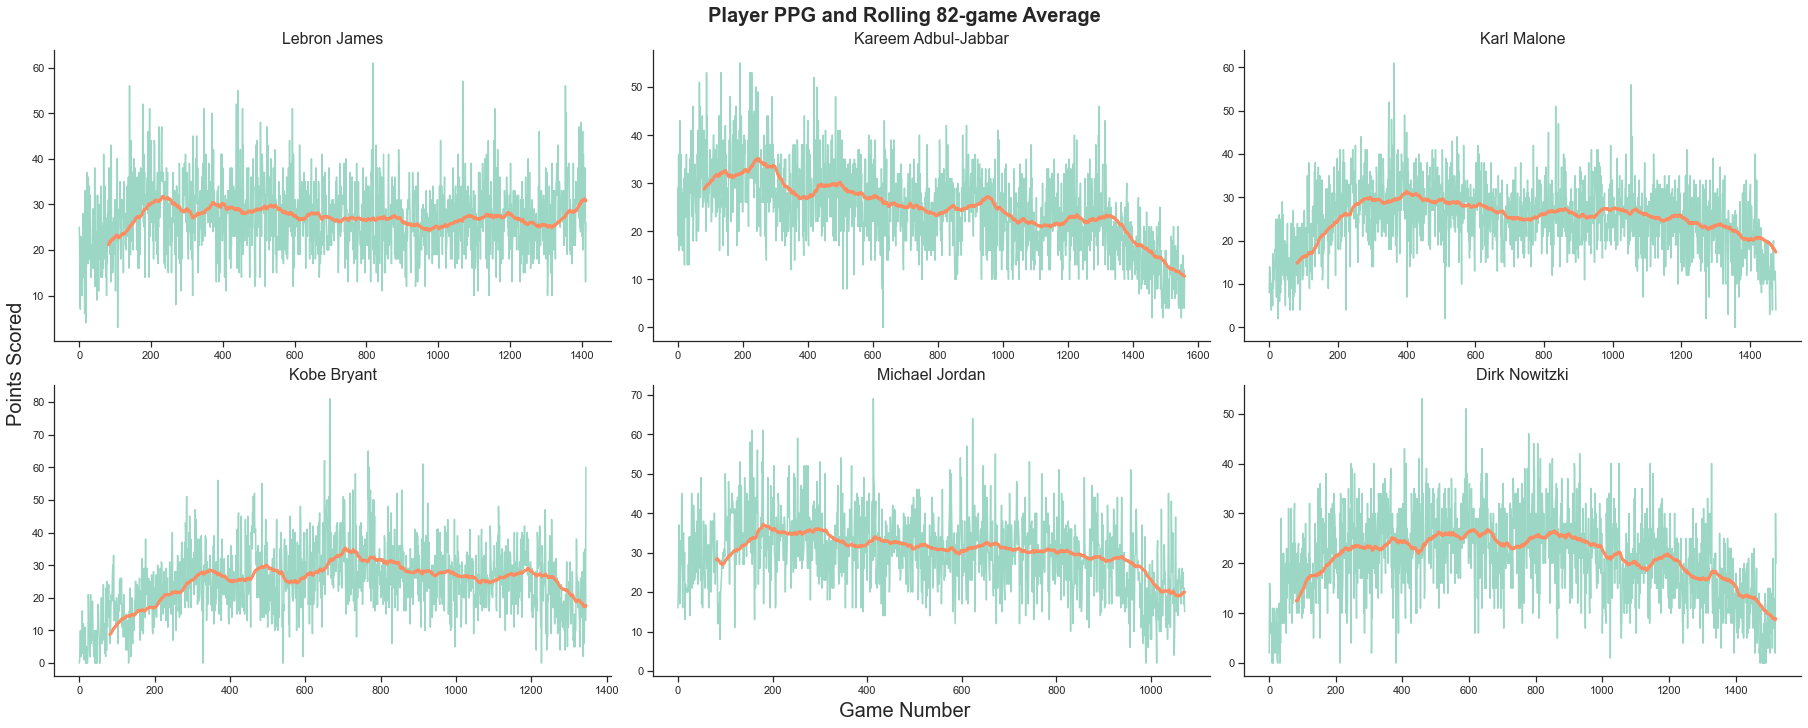

In [75]:
#----------- Velocity Plots ------------#
fig, axs = plt.subplots(2, 3, constrained_layout = True, figsize = (25, 10))
fontparams = {'family' : 'Arial', 'size' : 16}

window_size = 82

#-- LBJ 
axs[0, 0].plot(player_data[player_names[0]].PTS, alpha = .65)
axs[0, 0].plot(player_data[player_names[0]].PTS.rolling(window = window_size).mean()
                , linewidth = 3)
axs[0, 0].set_title(player_names[0], loc = 'center', fontdict = fontparams)
#axs[0, 0].legend(['LeBron James PPG', '82 Game Rolling Average'])

#-- KAJ 
axs[0, 1].plot(player_data[player_names[1]].PTS, alpha = .65)
axs[0, 1].plot(player_data[player_names[1]].PTS.rolling(window = window_size).mean()
                , linewidth = 3)
axs[0, 1].set_title(player_names[1], loc = 'center', fontdict = fontparams)

#-- KM
axs[0, 2].plot(player_data[player_names[2]].PTS, alpha = .65)
axs[0, 2].plot(player_data[player_names[2]].PTS.rolling(window = window_size).mean()
                , linewidth = 3)
axs[0, 2].set_title(player_names[2], loc = 'center', fontdict = fontparams)

#-- KB
axs[1, 0].plot(player_data[player_names[3]].PTS, alpha = .65)
axs[1, 0].plot(player_data[player_names[3]].PTS.rolling(window = window_size).mean()
                , linewidth = 3)
axs[1, 0].set_title(player_names[3], loc = 'center', fontdict = fontparams)

#-- MJ
axs[1, 1].plot(player_data[player_names[4]].PTS, alpha = .65)
axs[1, 1].plot(player_data[player_names[4]].PTS.rolling(window = window_size).mean()
                , linewidth = 3)
axs[1, 1].set_title(player_names[4], loc = 'center', fontdict = fontparams)

#-- DN
axs[1, 2].plot(player_data[player_names[5]].PTS, alpha = .65)
axs[1, 2].plot(player_data[player_names[5]].PTS.rolling(window = window_size).mean()
                , linewidth = 3)
axs[1, 2].set_title(player_names[5], loc = 'center', fontdict = fontparams)

#-- Final output details 
fig.suptitle('Player PPG and Rolling 82-game Average', size = 20, weight =  'bold')
fig.supxlabel('Game Number', size = 20)
fig.supylabel('Points Scored', size = 20)
fig.savefig('six_player_ppg_velocity.png', dpi = 300)
fig.show()

### Inflation Adjusted Scoring 

In [105]:
player_data['Lebron James'].SEASON_YEAR

0       2003
1       2003
2       2003
3       2003
4       2003
        ... 
1408    2022
1409    2022
1410    2022
1411    2022
1412    2022
Name: SEASON_YEAR, Length: 1413, dtype: object

In [111]:
#------ Join Data from League Averages onto Player DFs --------# 

ldata['PTS_LAG'] = ldata.PTS.shift(periods = 1)

for i in player_names: 
    player_data[i] = player_data[i].merge(ldata[['PTS', 'PTS_LAG', 'INFLATION', 'CPI_100']]
                                  , how = 'left'
                                  , left_on = 'SEASON_YEAR'
                                  , right_on = 'YEAR'
                                  , suffixes = ('', '_LGA'))
    
#-- Output check
player_data['Lebron James'][['PTS', 'PTS_LGA', 'PTS_LAG', 'INFLATION', 'CPI_100']]

In [117]:
player_data['Lebron James'].loc[player_data['Lebron James'].SEASON_YEAR != np.min(player_data['Lebron James'].SEASON_YEAR), 'PTS'] / (1 + player_data['Lebron James'].loc[player_data['Lebron James'].SEASON_YEAR != np.min(player_data['Lebron James'].SEASON_YEAR), 'INFLATION'])

79      26.905350
80      20.179012
81      29.788066
82      24.022634
83      36.514403
          ...    
1408    26.125984
1409    36.769904
1410    20.320210
1411    12.579178
1412    25.158355
Length: 1334, dtype: float64

In [120]:
#----- Inflation Adjusted Scoring -----#
for i in player_names:

    player_data[i]['REAL_PTS'] = None

    player_data[i].loc[player_data[i].SEASON_YEAR == np.min(player_data[i].SEASON_YEAR)
                                    , 'REAL_PTS'] = player_data[i].loc[player_data[i].SEASON_YEAR == np.min(player_data[i].SEASON_YEAR)
                                                                                    , 'PTS']
    
    player_data[i].loc[player_data[i].SEASON_YEAR == np.min(player_data[i].SEASON_YEAR)
                                    , 'REAL_PTS'] = player_data[i].loc[player_data[i].SEASON_YEAR != np.min(player_data[i].SEASON_YEAR)
                                                                       , 'PTS'] / (1 + player_data[i].loc[player_data[i].SEASON_YEAR != np.min(player_data[i].SEASON_YEAR)
                                                                                                          , 'INFLATION'])

In [125]:
player_data['Lebron James'][['PTS', 'INFLATION', 'CPI_100', 'REAL_PTS']]

,PTS,INFLATION,CPI_100,REAL_PTS
0,25,-0.017876,-0.066,NaN
1,21,-0.017876,-0.066,NaN
2,8,-0.017876,-0.066,NaN
3,7,-0.017876,-0.066,NaN
4,23,-0.017876,-0.066,NaN
...,...,...,...,...
1408,27,0.033454,0.143,None
1409,38,0.033454,0.143,None
1410,21,0.033454,0.143,None
1411,13,0.033454,0.143,None


In [126]:
for i in player_names:
    player_data[i]['CPI_100_PTS'] = None
    player_data[i]['CPI_100_PTS'] = player_data[i]['PTS'] / (1 + player_data[i]['CPI_100'])

In [128]:
player_data['Michael Jordan'][['PTS', 'CPI_100', 'CPI_100_PTS']]

,PTS,CPI_100,CPI_100_PTS
0,16,0.108,14.440433
1,21,0.108,18.953069
2,37,0.108,33.393502
3,25,0.108,22.563177
4,17,0.108,15.342960
...,...,...,...
1067,21,-0.049,22.082019
1068,25,-0.049,26.288118
1069,17,-0.049,17.875920
1070,21,-0.049,22.082019


/var/folders/bh/f_n1lys118dd__48sbs22ffm0000gn/T/ipykernel_83549/3000165986.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


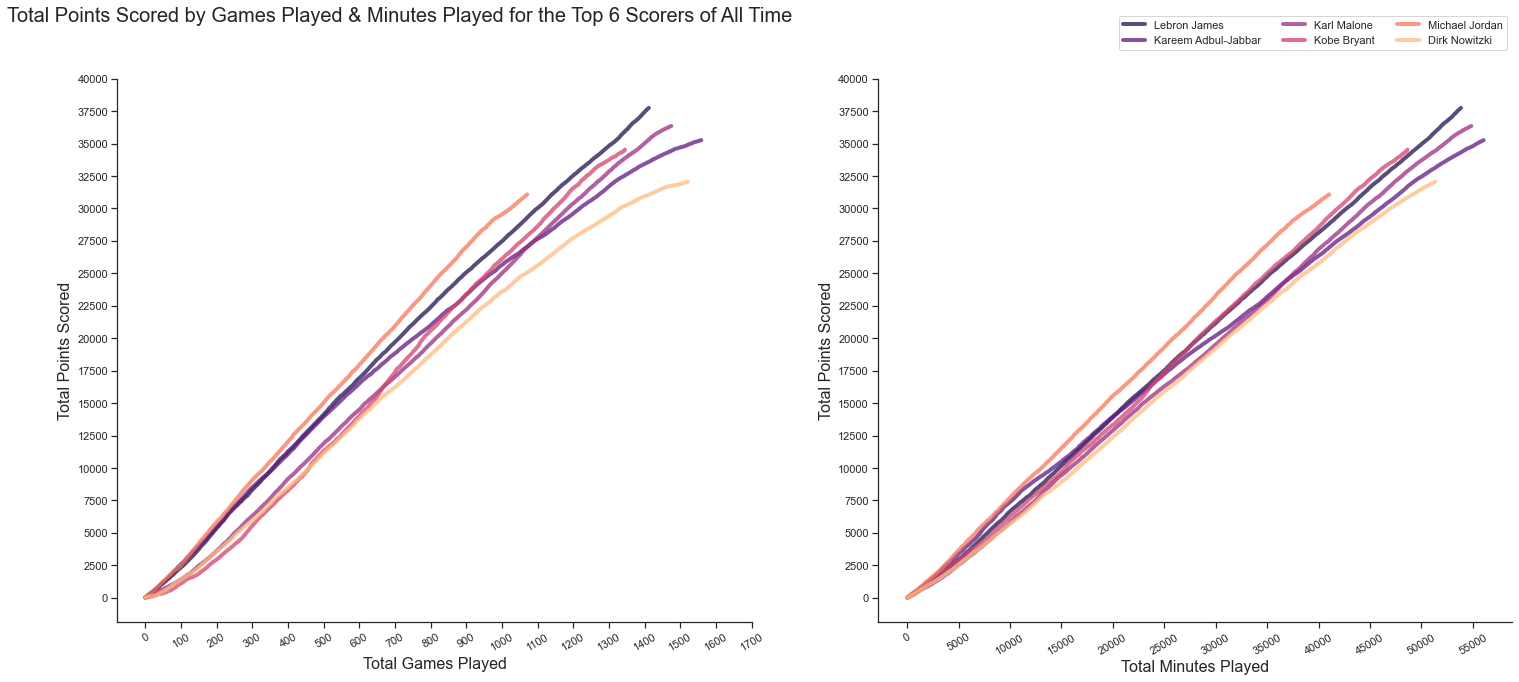

In [129]:
fig, ax = plt.subplots(1, 2, sharey = False, figsize = (25, 10))
sns.set_palette("Set2")
fontparams = {'font' : 'Arial', 'fontsize' : 16}

#-- Player career total points based on games played 
for i in player_names:
    ax[0].plot(player_data[i].CPI_100_PTS.cumsum()
               , linewidth = 4
               , alpha = .75)

ax[0].set_xticks(range(0, 1800, 100))
ax[0].set_xticklabels(labels = range(0,1800,100), rotation = 30)
ax[0].set_xlabel('Total Games Played', fontdict = fontparams)

ax[0].set_yticks(range(0, 42500, 2500))
ax[0].set_yticklabels(labels = range(0, 42500, 2500))
ax[0].set_ylabel('Total Points Scored', fontdict = fontparams)

#ax[0].set_title('Total Points Scored by Games Played & Minutes Played for the Top 6 Scorers of All Time'
#                , loc = 'left'
#                , fontdict = {'font' : 'Arial', 'fontsize' : 20})

# ax[0].legend(player_names)

#-- Player career total points based on minutes played
for i in player_names:
    ax[1].plot(player_data[i].MIN.cumsum()
                , player_data[i].CPI_100_PTS.cumsum()
                , linewidth = 4
                , alpha = .75)

ax[1].set_xticks(range(0, 60000, 5000))
ax[1].set_xticklabels(range(0, 60000, 5000), rotation = 30)                
ax[1].set_xlabel('Total Minutes Played', fontdict = fontparams)

ax[1].set_yticks(range(0, 42500, 2500))
ax[1].set_yticklabels(labels = range(0, 42500, 2500))
ax[1].set_ylabel('Total Points Scored', fontdict = fontparams)

fig.suptitle('Total Points Scored by Games Played & Minutes Played for the Top 6 Scorers of All Time', ha = 'right', fontsize = 20)
fig.legend(player_names, bbox_to_anchor=(.90, .975), ncol = 3)
fig.show()


In [140]:
big_data = pd.DataFrame()

for i in player_names:
    player_data[i]['PLAYER_NAME'] = i
    big_data = pd.concat([big_data, player_data[i]])

In [141]:
big_data

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,VIDEO_AVAILABLE,SEASON_YEAR,PTS_LGA,PTS_LGA,PTS_LAG,INFLATION,CPI_100,REAL_PTS,CPI_100_PTS,PLAYER_NAME
0,22003,2544,0020300014,2003-10-29,CLE @ SAC,L,42,12,20.0,0.600,...,0,2003,93.4,93.4,95.1,-0.017876,-0.066,NaN,26.766595,Lebron James
1,22003,2544,0020300018,2003-10-30,CLE @ PHX,L,41,8,17.0,0.471,...,0,2003,93.4,93.4,95.1,-0.017876,-0.066,NaN,22.483940,Lebron James
2,22003,2544,0020300038,2003-11-01,CLE @ POR,L,39,3,12.0,0.250,...,0,2003,93.4,93.4,95.1,-0.017876,-0.066,NaN,8.565310,Lebron James
3,22003,2544,0020300057,2003-11-05,CLE vs. DEN,L,41,3,11.0,0.273,...,0,2003,93.4,93.4,95.1,-0.017876,-0.066,NaN,7.494647,Lebron James
4,22003,2544,0020300068,2003-11-07,CLE @ IND,L,44,8,18.0,0.444,...,0,2003,93.4,93.4,95.1,-0.017876,-0.066,NaN,24.625268,Lebron James
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,22018,1717,0021801172,2019-04-03,DAL vs. MIN,L,22,4,12.0,0.333,...,1,2018,111.2,111.2,106.3,0.046096,0.112,None,8.093525,Dirk Nowitzki
1518,22018,1717,0021801187,2019-04-05,DAL vs. MEM,L,25,5,12.0,0.417,...,1,2018,111.2,111.2,106.3,0.046096,0.112,None,10.791367,Dirk Nowitzki
1519,22018,1717,0021801201,2019-04-07,DAL @ MEM,W,12,1,5.0,0.200,...,1,2018,111.2,111.2,106.3,0.046096,0.112,None,1.798561,Dirk Nowitzki
1520,22018,1717,0021801216,2019-04-09,DAL vs. PHX,W,33,11,31.0,0.355,...,1,2018,111.2,111.2,106.3,0.046096,0.112,None,26.978417,Dirk Nowitzki


In [157]:
big_data.groupby(['PLAYER_NAME', 'SEASON_YEAR']).PTS.sum().reset_index().shape

(115, 3)

In [176]:
wdata = big_data.pivot_table(values = 'PTS', index = 'SEASON_YEAR', columns = 'PLAYER_NAME', aggfunc= 'sum')

In [177]:
wdata['Michael Jordan'][1993] = 0
wdata['Michael Jordan'][1998] = 0
wdata['Michael Jordan'][1999] = 0
wdata['Michael Jordan'][2000] = 0

<AxesSubplot:xlabel='SEASON_YEAR'>

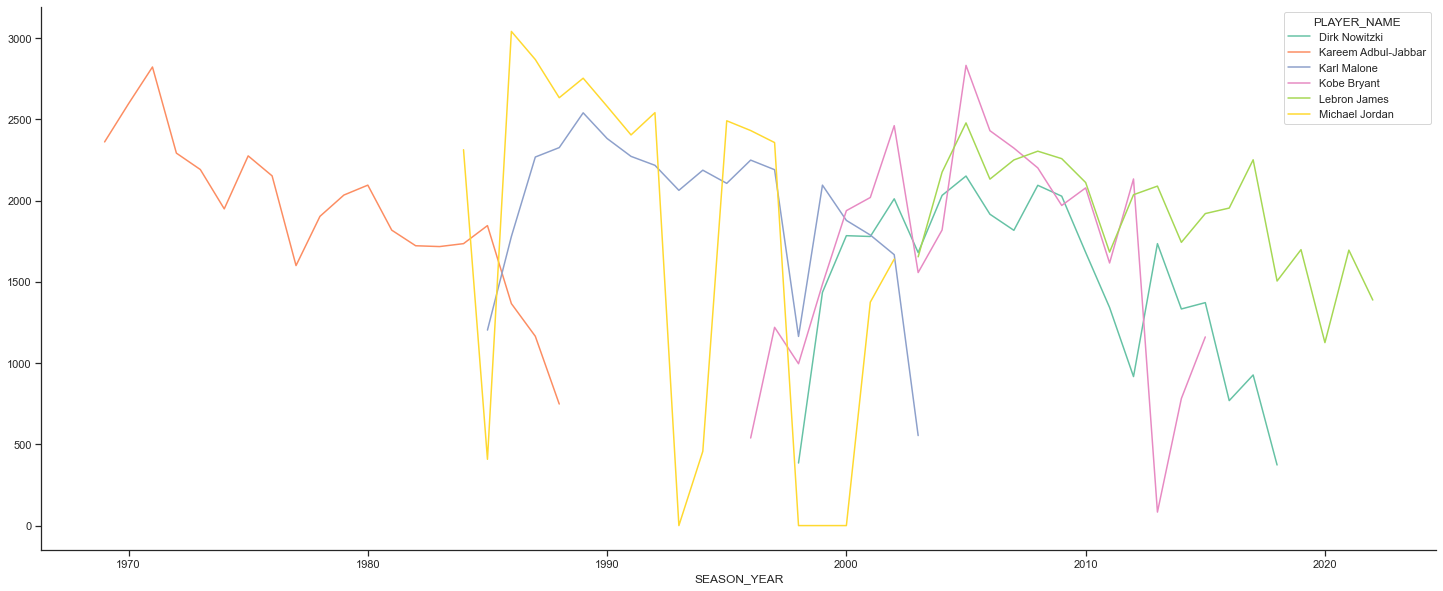

In [178]:
wdata.plot(figsize = (25, 10))

In [179]:
wdata.cumsum()

PLAYER_NAME,Dirk Nowitzki,Kareem Adbul-Jabbar,Karl Malone,Kobe Bryant,Lebron James,Michael Jordan
SEASON_YEAR,,,,,,
1969,NaN,2361.0,NaN,NaN,NaN,NaN
1970,NaN,4957.0,NaN,NaN,NaN,NaN
1971,NaN,7779.0,NaN,NaN,NaN,NaN
1972,NaN,10071.0,NaN,NaN,NaN,NaN
1973,NaN,12262.0,NaN,NaN,NaN,NaN
1974,NaN,14211.0,NaN,NaN,NaN,NaN
1975,NaN,16486.0,NaN,NaN,NaN,NaN
1976,NaN,18638.0,NaN,NaN,NaN,NaN
1977,NaN,20238.0,NaN,NaN,NaN,NaN


In [158]:
big_data_1 = big_data.groupby(['PLAYER_NAME', 'SEASON_YEAR']).PTS.sum().reset_index()
big_data_1['TOTAL_PTS'] = big_data.groupby(['PLAYER_NAME', 'SEASON_YEAR']).PTS.sum().reset_index().groupby('PLAYER_NAME').PTS.cumsum()
big_data_1.head()

,PLAYER_NAME,SEASON_YEAR,PTS,TOTAL_PTS
0,Dirk Nowitzki,1998,385,385
1,Dirk Nowitzki,1999,1435,1820
2,Dirk Nowitzki,2000,1784,3604
3,Dirk Nowitzki,2001,1779,5383
4,Dirk Nowitzki,2002,2011,7394


In [163]:
big_data_1

,PLAYER_NAME,SEASON_YEAR,PTS,TOTAL_PTS
0,Dirk Nowitzki,1998,385,385
1,Dirk Nowitzki,1999,1435,1820
2,Dirk Nowitzki,2000,1784,3604
3,Dirk Nowitzki,2001,1779,5383
4,Dirk Nowitzki,2002,2011,7394
...,...,...,...,...
110,Michael Jordan,1995,2491,24489
111,Michael Jordan,1996,2431,26920
112,Michael Jordan,1997,2357,29277
113,Michael Jordan,2001,1375,30652


In [159]:
big_data_1.loc[big_data_1['PLAYER_NAME'] == 'Lebron James']

,PLAYER_NAME,SEASON_YEAR,PTS,TOTAL_PTS
80,Lebron James,2003,1654,1654
81,Lebron James,2004,2175,3829
82,Lebron James,2005,2478,6307
83,Lebron James,2006,2132,8439
84,Lebron James,2007,2250,10689
85,Lebron James,2008,2304,12993
86,Lebron James,2009,2258,15251
87,Lebron James,2010,2111,17362
88,Lebron James,2011,1683,19045
89,Lebron James,2012,2036,21081


/var/folders/bh/f_n1lys118dd__48sbs22ffm0000gn/T/ipykernel_83549/1541827811.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


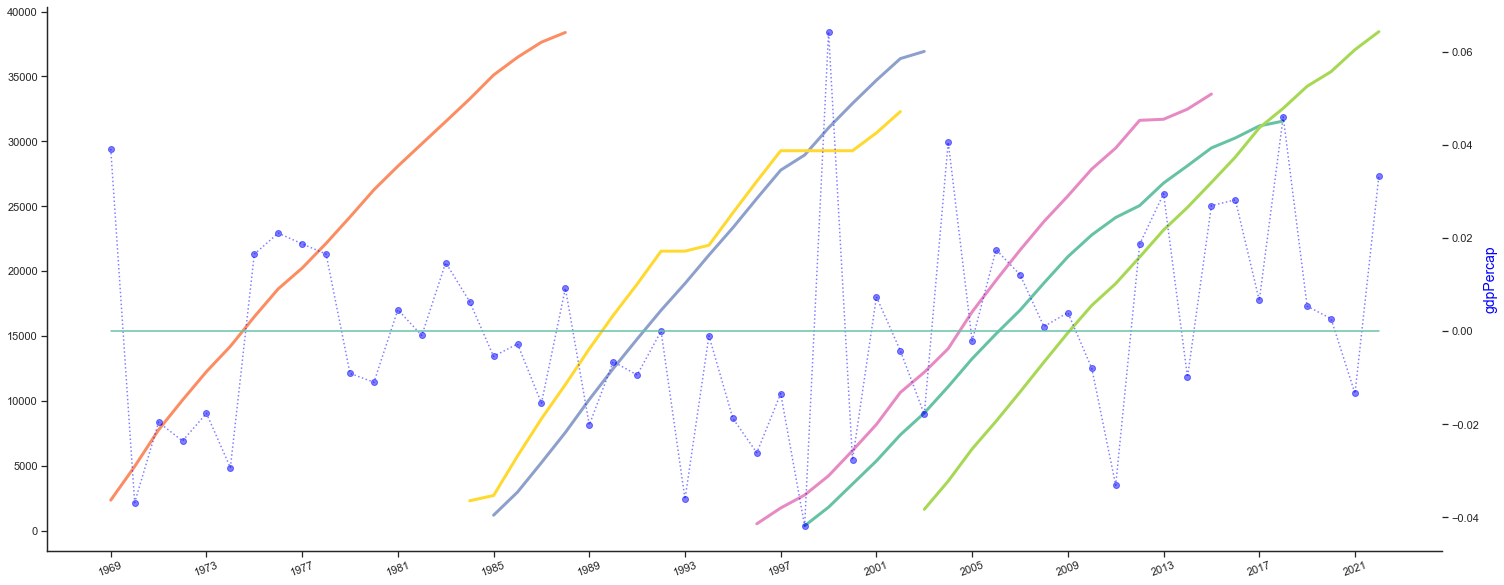

In [211]:
fig,ax = plt.subplots( figsize = (25, 10) )

ax.plot(wdata.cumsum()
        , linewidth = 3
        )

ax.set_xticks(
    range(
    np.min(wdata.index)
    , np.max(wdata.index)
    , 4
    )
)
    
ax.set_xticklabels(
        range(
        np.min(wdata.index)
        , np.max(wdata.index)
        , 4
        )
    , rotation = 20
)


# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object

ax2.plot(ldata.iloc[23:].INFLATION, color="blue", marker="o", alpha = .5, linestyle = ':')
ax2.plot(ldata.iloc[23:].index, np.linspace(0,0,len(ldata.iloc[23:].index)))


ax2.set_ylabel("gdpPercap",color="blue",fontsize=14)

fig.show()

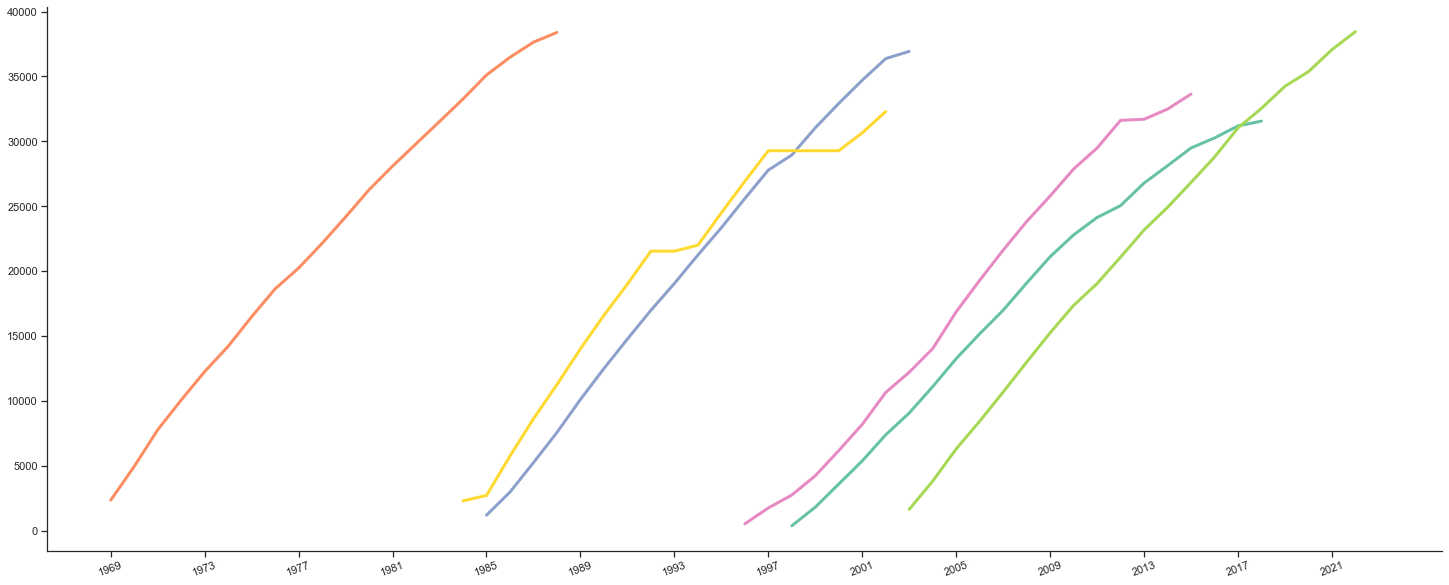

In [244]:
fig,ax = plt.subplots( figsize = (25, 10) )

ax.plot(wdata.cumsum()
        , linewidth = 3
        )

ax.set_xticks(
    range(
    np.min(wdata.index)
    , np.max(wdata.index)
    , 4
    )
)
    
ax.set_xticklabels(
        range(
        np.min(wdata.index)
        , np.max(wdata.index)
        , 4
        )
    , rotation = 20
)

for i in range(len(wdata2)):
    ax.axvspan(xmin = wdata2.iloc[i]['x_min']
               , xmax = wdata2.iloc[i]['x_max']
               , ymin = wdata2.iloc[i]['y_max']
               , ymax = wdata2.iloc[i]['y_max']
               , facecolor = 'r'
               , alpha = 1.0)

In [229]:
wdata2 = pd.DataFrame(ldata.iloc[23:].INFLATION)

wdata2['ENVIRONMENT'] = np.where(wdata2['INFLATION'] < 0, 'DEFLATION', 'INFLATION')
wdata2['ENVIRONMENT_BOOLEAN'] = np.where(wdata2['INFLATION'] > 0, True, False)
wdata2['ENVIRONMENT_SIGN'] = np.sign(wdata2.INFLATION)

wdata2['x_min'] = np.where(wdata2['ENVIRONMENT'] == "INFLATION", wdata2.index, np.NaN)
wdata2['x_max'] = np.where(wdata2['ENVIRONMENT'] == "INFLATION", pd.Series(wdata2.index).shift(periods = -1), np.NaN)
wdata2['y_min'] = np.where(wdata2['ENVIRONMENT'] == "INFLATION", 0, np.NaN)
wdata2['y_max'] = np.where(wdata2['ENVIRONMENT'] == "INFLATION", 40000, np.NaN)

wdata2

,INFLATION,ENVIRONMENT,ENVIRONMENT_BOOLEAN,ENVIRONMENT_SIGN,x_min,x_max,y_min,y_max
YEAR,,,,,,,,
1969,0.039181,INFLATION,True,1.0,1969.0,1970.0,0.0,40000.0
1970,-0.036847,DEFLATION,False,-1.0,NaN,NaN,NaN,NaN
1971,-0.019573,DEFLATION,False,-1.0,NaN,NaN,NaN,NaN
1972,-0.023593,DEFLATION,False,-1.0,NaN,NaN,NaN,NaN
1973,-0.017658,DEFLATION,False,-1.0,NaN,NaN,NaN,NaN
1974,-0.029328,DEFLATION,False,-1.0,NaN,NaN,NaN,NaN
1975,0.016569,INFLATION,True,1.0,1975.0,1976.0,0.0,40000.0
1976,0.021093,INFLATION,True,1.0,1976.0,1977.0,0.0,40000.0
1977,0.018779,INFLATION,True,1.0,1977.0,1978.0,0.0,40000.0


In [234]:
wdata2 = pd.DataFrame(ldata.iloc[23:].INFLATION)

wdata2['ENVIRONMENT'] = np.where(wdata2['INFLATION'] < 0, 'DEFLATION', 'INFLATION')
wdata2['ENVIRONMENT_BOOLEAN'] = np.where(wdata2['INFLATION'] > 0, True, False)
wdata2['ENVIRONMENT_SIGN'] = np.sign(wdata2.INFLATION)

wdata2['x_min'] = np.where(wdata2['ENVIRONMENT'] == "INFLATION", wdata2.index, np.NaN)
wdata2['x_max'] = np.where(wdata2['ENVIRONMENT'] == "INFLATION", pd.Series(wdata2.index).shift(periods = -1), np.NaN)
wdata2['y_min'] = np.where(wdata2['ENVIRONMENT'] == "INFLATION", 0, np.NaN)
wdata2['y_max'] = np.where(wdata2['ENVIRONMENT'] == "INFLATION", 40000, np.NaN)

wdata2.iloc[-1]['x_max'] = 2023

wdata2

/var/folders/bh/f_n1lys118dd__48sbs22ffm0000gn/T/ipykernel_83549/204865807.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdata2.iloc[-1]['x_max'] = 2023


,INFLATION,ENVIRONMENT,ENVIRONMENT_BOOLEAN,ENVIRONMENT_SIGN,x_min,x_max,y_min,y_max
YEAR,,,,,,,,
1969,0.039181,INFLATION,True,1.0,1969.0,1970.0,0.0,40000.0
1970,-0.036847,DEFLATION,False,-1.0,NaN,NaN,NaN,NaN
1971,-0.019573,DEFLATION,False,-1.0,NaN,NaN,NaN,NaN
1972,-0.023593,DEFLATION,False,-1.0,NaN,NaN,NaN,NaN
1973,-0.017658,DEFLATION,False,-1.0,NaN,NaN,NaN,NaN
1974,-0.029328,DEFLATION,False,-1.0,NaN,NaN,NaN,NaN
1975,0.016569,INFLATION,True,1.0,1975.0,1976.0,0.0,40000.0
1976,0.021093,INFLATION,True,1.0,1976.0,1977.0,0.0,40000.0
1977,0.018779,INFLATION,True,1.0,1977.0,1978.0,0.0,40000.0


In [235]:
wdata2 = pd.DataFrame(ldata.iloc[23:].INFLATION)

wdata2['ENVIRONMENT'] = np.where(wdata2['INFLATION'] < 0, 'DEFLATION', 'INFLATION')
wdata2['ENVIRONMENT_BOOLEAN'] = np.where(wdata2['INFLATION'] > 0, True, False)
wdata2['ENVIRONMENT_SIGN'] = np.sign(wdata2.INFLATION)

wdata2['x_min'] = np.where(wdata2['ENVIRONMENT'] == "INFLATION", wdata2.index, np.NaN)
wdata2['x_max'] = np.where(wdata2['ENVIRONMENT'] == "INFLATION", pd.Series(wdata2.index).shift(periods = -1), np.NaN)
wdata2['y_min'] = np.where(wdata2['ENVIRONMENT'] == "INFLATION", 0, np.NaN)
wdata2['y_max'] = np.where(wdata2['ENVIRONMENT'] == "INFLATION", 40000, np.NaN)

wdata2.x_max.fillna(2023, inplace = True)

wdata2 = wdata2.dropna()

In [236]:
wdata2

,INFLATION,ENVIRONMENT,ENVIRONMENT_BOOLEAN,ENVIRONMENT_SIGN,x_min,x_max,y_min,y_max
YEAR,,,,,,,,
1969,0.039181,INFLATION,True,1.0,1969.0,1970.0,0.0,40000.0
1975,0.016569,INFLATION,True,1.0,1975.0,1976.0,0.0,40000.0
1976,0.021093,INFLATION,True,1.0,1976.0,1977.0,0.0,40000.0
1977,0.018779,INFLATION,True,1.0,1977.0,1978.0,0.0,40000.0
1978,0.016590,INFLATION,True,1.0,1978.0,1979.0,0.0,40000.0
1981,0.004625,INFLATION,True,1.0,1981.0,1982.0,0.0,40000.0
1983,0.014747,INFLATION,True,1.0,1983.0,1984.0,0.0,40000.0
1984,0.006358,INFLATION,True,1.0,1984.0,1985.0,0.0,40000.0
1988,0.009242,INFLATION,True,1.0,1988.0,1989.0,0.0,40000.0


In [241]:
wdata2.iloc[0]

INFLATION               0.039181
ENVIRONMENT            INFLATION
ENVIRONMENT_BOOLEAN         True
ENVIRONMENT_SIGN             1.0
x_min                     1969.0
x_max                     1970.0
y_min                        0.0
y_max                    40000.0
Name: 1969, dtype: object